In [ ]:
# 1. Data Exploration

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [5]:
# DATA EXPLORATION (Score: 2)

print("=== DATA EXPLORATION ===\n")
df = pd.read_csv('Employee.csv')
# Explore unique values in each feature
print("Unique values in each feature:")
for col in df.columns:
    unique_vals = df[col].unique()
    print(f"{col}: {len(unique_vals)} unique values")
    print(f"Values: {unique_vals[:10]}{'...' if len(unique_vals) > 10 else ''}\n")

# Statistical analysis
print("Statistical Summary:")
print(df.describe(include='all'))
print("\n")

# Data types and missing values info
print("Data Information:")
print(df.info())
print("\n")




=== DATA EXPLORATION ===

Unique values in each feature:
Company: 7 unique values
Values: ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']

Age: 30 unique values
Values: [20. 30. 35. 40. 23. nan 34. 45. 18. 22.]...

Salary: 41 unique values
Values: [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089.]...

Place: 12 unique values
Values: ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal']...

Country: 1 unique values
Values: ['India']

Gender: 2 unique values
Values: [0 1]

Statistical Summary:
       Company         Age       Salary   Place Country      Gender
count      140  130.000000   124.000000     134     148  148.000000
unique       6         NaN          NaN      11       1         NaN
top        TCS         NaN          NaN  Mumbai   India         NaN
freq        53         NaN          NaN      37     148         NaN
mean       NaN   30.484615  5312.467742     NaN     NaN    0.222973
st

In [7]:
# DATA CLEANING (Score: 2)

print("=== DATA CLEANING ===\n")

# Check initial missing values
print("Missing values before cleaning:")
print(df.isnull().sum())
print("\n")

# Replace 0 in Age with NaN
df['Age'].replace(0, np.nan, inplace=True)
print("Replaced 0 values in Age with NaN")

# Check missing values after replacing 0s
print(f"Missing values in Age after replacing 0s: {df['Age'].isnull().sum()}")

# Treat null values
# For numerical columns: use median
for col in ['Age', 'Salary']:
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"Filled missing {col} values with median: {median_val}")

# For categorical columns: use mode
for col in ['Company', 'Place', 'Gender']:
    if df[col].isnull().sum() > 0:
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)
        print(f"Filled missing {col} values with mode: {mode_val}")

# Remove duplicate rows
initial_rows = len(df)
df.drop_duplicates(inplace=True)
final_rows = len(df)
print(f"\nRemoved {initial_rows - final_rows} duplicate rows")

# Find outliers using IQR method
def find_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Check for outliers in Age and Salary
for col in ['Age', 'Salary']:
    outliers, lower, upper = find_outliers(df, col)
    print(f"\nOutliers in {col}: {len(outliers)} records")
    print(f"Valid range: {lower:.2f} to {upper:.2f}")

print(f"\nFinal dataset shape after cleaning: {df.shape}")


=== DATA CLEANING ===

Missing values before cleaning:
Company     8
Age        17
Salary     23
Place      14
Country     0
Gender      0
dtype: int64


Replaced 0 values in Age with NaN
Missing values in Age after replacing 0s: 23
Filled missing Age values with median: 33.0
Filled missing Salary values with median: 5000.0
Filled missing Company values with mode: TCS
Filled missing Place values with mode: Mumbai

Removed 0 duplicate rows

Outliers in Age: 0 records
Valid range: 5.38 to 54.38

Outliers in Salary: 0 records
Valid range: -3013.50 to 13142.50

Final dataset shape after cleaning: (144, 6)


=== DATA ANALYSIS ===

Filtered data (Age > 40 & Salary < 5000): 15 records


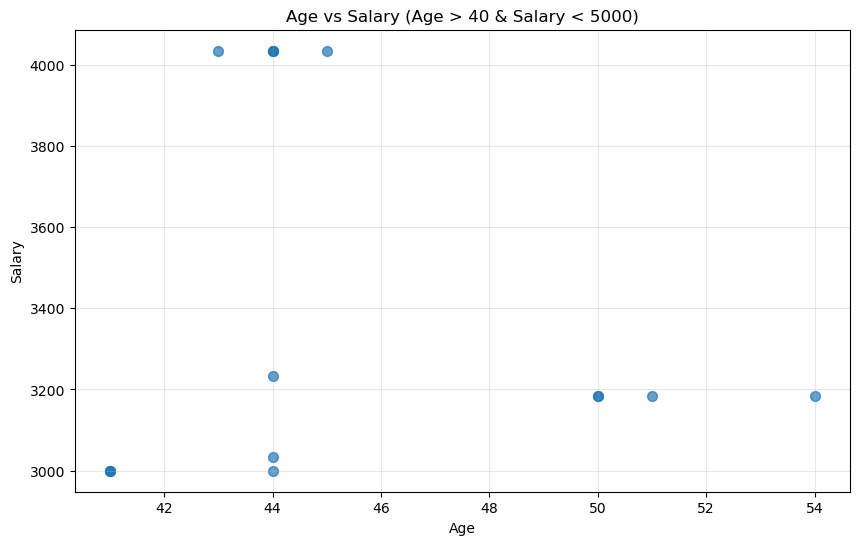


People count by location:
Mumbai        48
Calcutta      32
Chennai       14
Delhi         14
Cochin        13
Noida          8
Hyderabad      8
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
Name: Place, dtype: int64


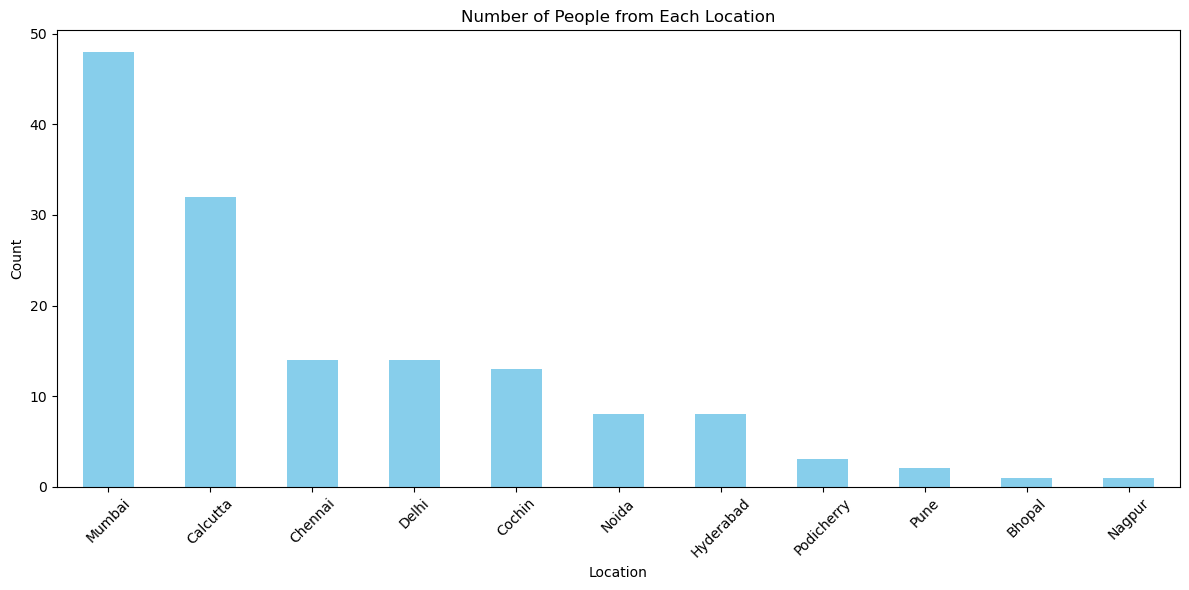

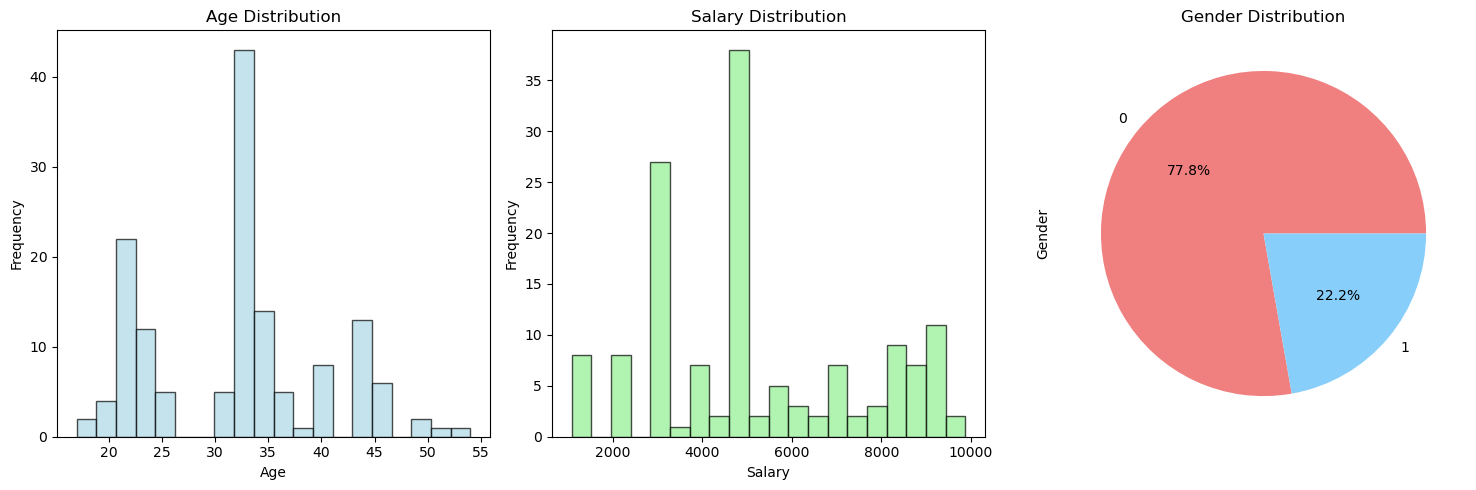

In [8]:
# 3.DATA ANALYSIS 

print("=== DATA ANALYSIS ===\n")

# Filter data with age > 40 and salary < 5000
filtered_df = df[(df['Age'] > 40) & (df['Salary'] < 5000)]
print(f"Filtered data (Age > 40 & Salary < 5000): {len(filtered_df)} records")

# Plot Age vs Salary for filtered data
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['Age'], filtered_df['Salary'], alpha=0.7, s=50)
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Age vs Salary (Age > 40 & Salary < 5000)')
plt.grid(True, alpha=0.3)
plt.show()

# Count people from each place and visualize
place_counts = df['Place'].value_counts()
print("\nPeople count by location:")
print(place_counts)

# Visualize location distribution
plt.figure(figsize=(12, 6))
place_counts.plot(kind='bar', color='skyblue')
plt.title('Number of People from Each Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Additional analysis
plt.figure(figsize=(15, 5))

# Age distribution
plt.subplot(1, 3, 1)
plt.hist(df['Age'], bins=20, color='lightblue', edgecolor='black', alpha=0.7)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Salary distribution
plt.subplot(1, 3, 2)
plt.hist(df['Salary'], bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')

# Gender distribution
plt.subplot(1, 3, 3)
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title('Gender Distribution')

plt.tight_layout()
plt.show()


In [12]:
# 4.DATA ENCODING

print("=== DATA ENCODING ===\n")

# Create a copy for encoding
df_encoded = df.copy()

# Label Encoding for categorical variables
label_encoders = {}

categorical_columns = ['Company', 'Place', 'Gender']

for col in categorical_columns:
    le = LabelEncoder()
    df_encoded[f'{col}_encoded'] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le
    
    # Show encoding mapping
    unique_values = df[col].unique()
    encoded_values = le.transform(unique_values)
    mapping = dict(zip(unique_values, encoded_values))
    print(f"{col} encoding mapping:")
    print(mapping)
    print()

# Display first few rows with encoded features
print("Original vs Encoded features:")
comparison_cols = ['Company', 'Company_encoded', 'Place', 'Place_encoded', 'Gender', 'Gender_encoded']
print(df_encoded[comparison_cols].head())

# One-hot encoding example (alternative approach)
df_onehot = pd.get_dummies(df, columns=['Company', 'Place', 'Gender'], prefix=['Company', 'Place', 'Gender'])
print(f"\nOne-hot encoded dataset shape: {df_onehot.shape}")
print("One-hot encoded columns:", [col for col in df_onehot.columns if '_' in col])


=== DATA ENCODING ===

Company encoding mapping:
{'TCS': 4, 'Infosys': 2, 'CTS': 0, 'Tata Consultancy Services': 5, 'Congnizant': 1, 'Infosys Pvt Lmt': 3}

Place encoding mapping:
{'Chennai': 2, 'Mumbai': 6, 'Calcutta': 1, 'Delhi': 4, 'Podicherry': 9, 'Cochin': 3, 'Noida': 8, 'Hyderabad': 5, 'Bhopal': 0, 'Nagpur': 7, 'Pune': 10}

Gender encoding mapping:
{0: 0, 1: 1}

Original vs Encoded features:
   Company  Company_encoded     Place  Place_encoded  Gender  Gender_encoded
0      TCS                4   Chennai              2       0               0
1  Infosys                2    Mumbai              6       0               0
2      TCS                4  Calcutta              1       0               0
3  Infosys                2     Delhi              4       0               0
4      TCS                4    Mumbai              6       0               0

One-hot encoded dataset shape: (144, 22)
One-hot encoded columns: ['Company_CTS', 'Company_Congnizant', 'Company_Infosys', 'Company_Info

=== FEATURE SCALING ===

Features selected for scaling:
['Age', 'Salary', 'Company_encoded', 'Place_encoded', 'Gender_encoded']
Data shape: (144, 5)

StandardScaler Results (first 5 rows):
        Age    Salary  Company_encoded  Place_encoded  Gender_encoded
0 -1.484676 -0.100827         0.991489      -0.893255       -0.534522
1 -0.267174 -0.100827        -0.239325       0.750562       -0.534522
2  0.341577 -1.243735         0.991489      -1.304209       -0.534522
3  0.950328 -0.947426        -0.239325      -0.071346       -0.534522
4 -1.119426 -0.524127         0.991489       0.750562       -0.534522
Standard Scaled - Mean: [0.0, 0.0, 0.0, 0.0, 0.0]
Standard Scaled - Std: [1.003, 1.003, 1.003, 1.003, 1.003]

MinMaxScaler Results (first 5 rows):
        Age    Salary  Company_encoded  Place_encoded  Gender_encoded
0  0.081081  0.445089              0.8            0.2             0.0
1  0.351351  0.445089              0.4            0.6             0.0
2  0.486486  0.137817             

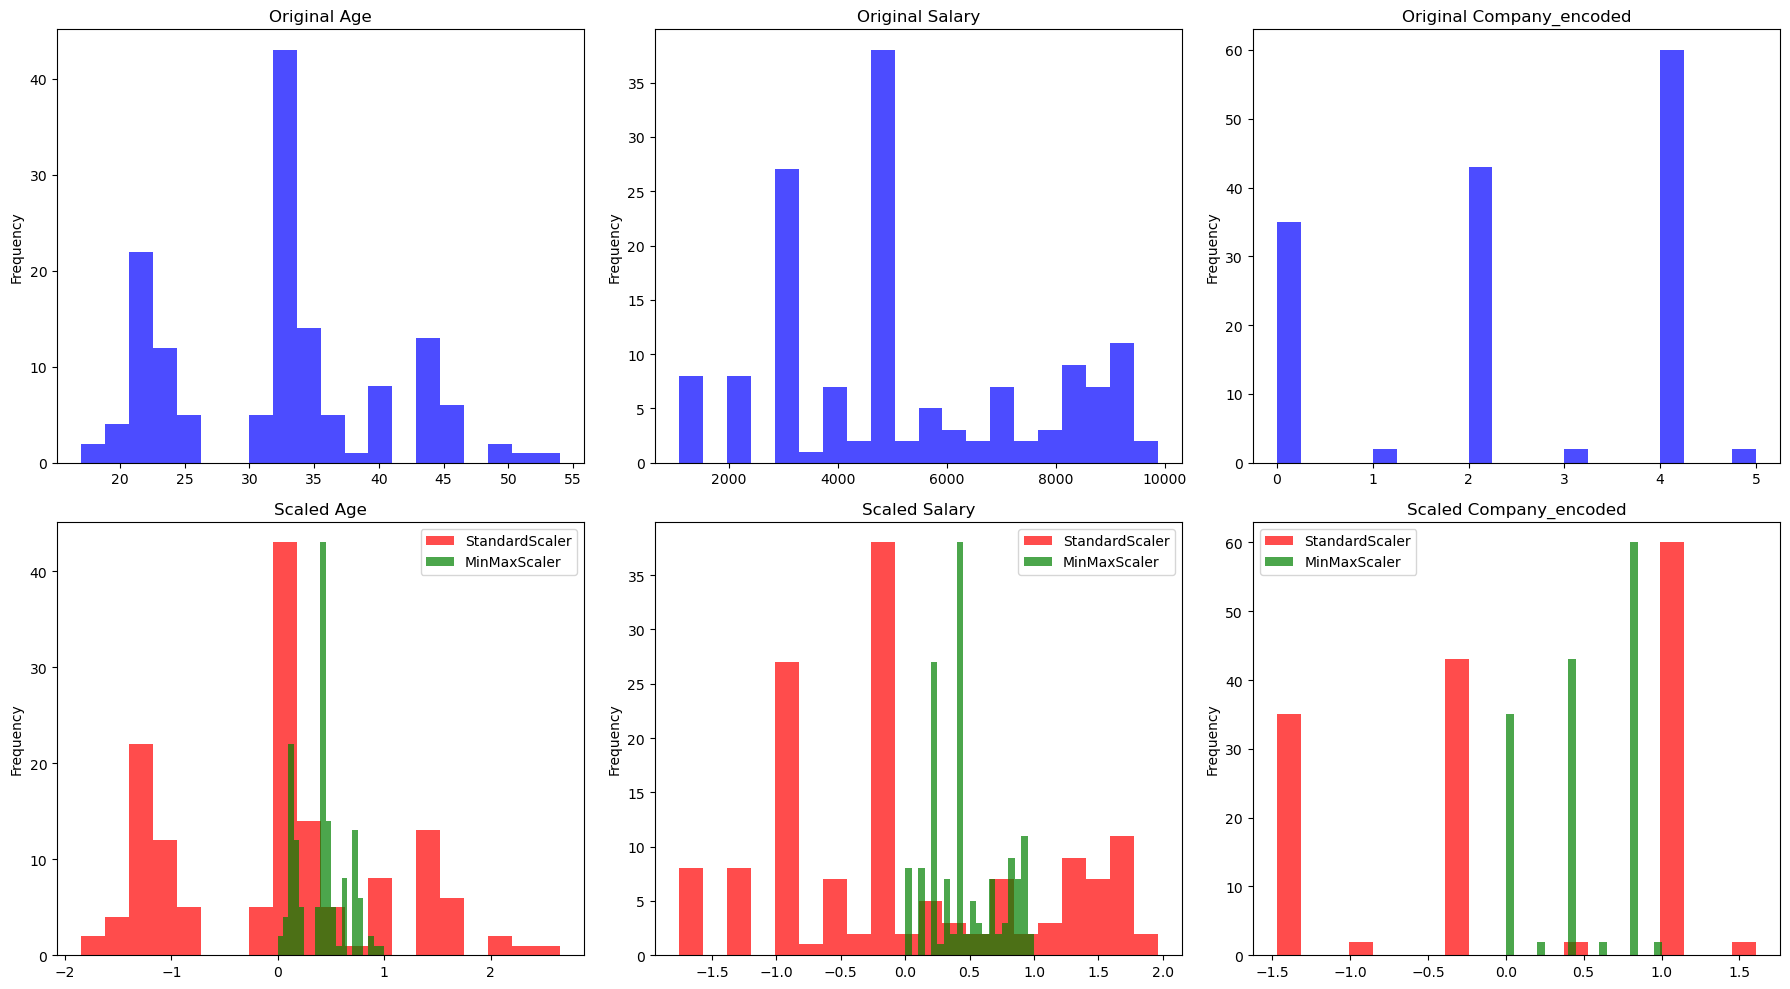


=== DATA PREPROCESSING COMPLETE ===
Original dataset shape: (144, 6)
Final processed dataset shape: (144, 9)
Standard scaled dataset shape: (144, 5)
MinMax scaled dataset shape: (144, 5)


In [13]:
# FEATURE SCALING

print("=== FEATURE SCALING ===\n")

# Select numerical features for scaling
numerical_features = ['Age', 'Salary', 'Company_encoded', 'Place_encoded', 'Gender_encoded']

# Prepare data for scaling
X = df_encoded[numerical_features].copy()

print("Features selected for scaling:")
print(numerical_features)
print(f"Data shape: {X.shape}")

# StandardScaler (Z-score normalization)
scaler_standard = StandardScaler()
X_standard_scaled = scaler_standard.fit_transform(X)
df_standard_scaled = pd.DataFrame(X_standard_scaled, columns=numerical_features)

print("\nStandardScaler Results (first 5 rows):")
print(df_standard_scaled.head())
print(f"Standard Scaled - Mean: {df_standard_scaled.mean().round(3).tolist()}")
print(f"Standard Scaled - Std: {df_standard_scaled.std().round(3).tolist()}")

# MinMaxScaler (0-1 normalization)
scaler_minmax = MinMaxScaler()
X_minmax_scaled = scaler_minmax.fit_transform(X)
df_minmax_scaled = pd.DataFrame(X_minmax_scaled, columns=numerical_features)

print("\nMinMaxScaler Results (first 5 rows):")
print(df_minmax_scaled.head())
print(f"MinMax Scaled - Min: {df_minmax_scaled.min().tolist()}")
print(f"MinMax Scaled - Max: {df_minmax_scaled.max().tolist()}")

# Visualize scaling effects
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

features_to_plot = ['Age', 'Salary', 'Company_encoded']

for i, feature in enumerate(features_to_plot):
    # Original data
    axes[0, i].hist(X[feature], bins=20, alpha=0.7, color='blue', label='Original')
    axes[0, i].set_title(f'Original {feature}')
    axes[0, i].set_ylabel('Frequency')
    
    # Scaled data comparison
    axes[1, i].hist(df_standard_scaled[feature], bins=20, alpha=0.7, color='red', label='StandardScaler')
    axes[1, i].hist(df_minmax_scaled[feature], bins=20, alpha=0.7, color='green', label='MinMaxScaler')
    axes[1, i].set_title(f'Scaled {feature}')
    axes[1, i].set_ylabel('Frequency')
    axes[1, i].legend()

plt.tight_layout()
plt.show()

print("\n=== DATA PREPROCESSING COMPLETE ===")
print(f"Original dataset shape: {df.shape}")
print(f"Final processed dataset shape: {df_encoded.shape}")
print(f"Standard scaled dataset shape: {df_standard_scaled.shape}")
print(f"MinMax scaled dataset shape: {df_minmax_scaled.shape}")


In [14]:
# SUMMARY AND FINAL RESULTS

print("=== PREPROCESSING SUMMARY ===\n")

# Create summary report
summary = {
    'Original Shape': df.shape,
    'Final Shape': df_encoded.shape,
    'Missing Values Handled': 'Yes',
    'Duplicates Removed': 'Yes',
    'Outliers Detected': 'Yes',
    'Categorical Encoding': 'Label Encoding Applied',
    'Feature Scaling': 'StandardScaler & MinMaxScaler Applied'
}

for key, value in summary.items():
    print(f"{key}: {value}")



=== PREPROCESSING SUMMARY ===

Original Shape: (144, 6)
Final Shape: (144, 9)
Missing Values Handled: Yes
Duplicates Removed: Yes
Outliers Detected: Yes
Categorical Encoding: Label Encoding Applied
Feature Scaling: StandardScaler & MinMaxScaler Applied
